EDA and data preprocessing

In [1]:
# import libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('Data/training_sample.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [5]:
df_train.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1


In [6]:
df_train.isna().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [7]:
df_train.duplicated().sum()

0

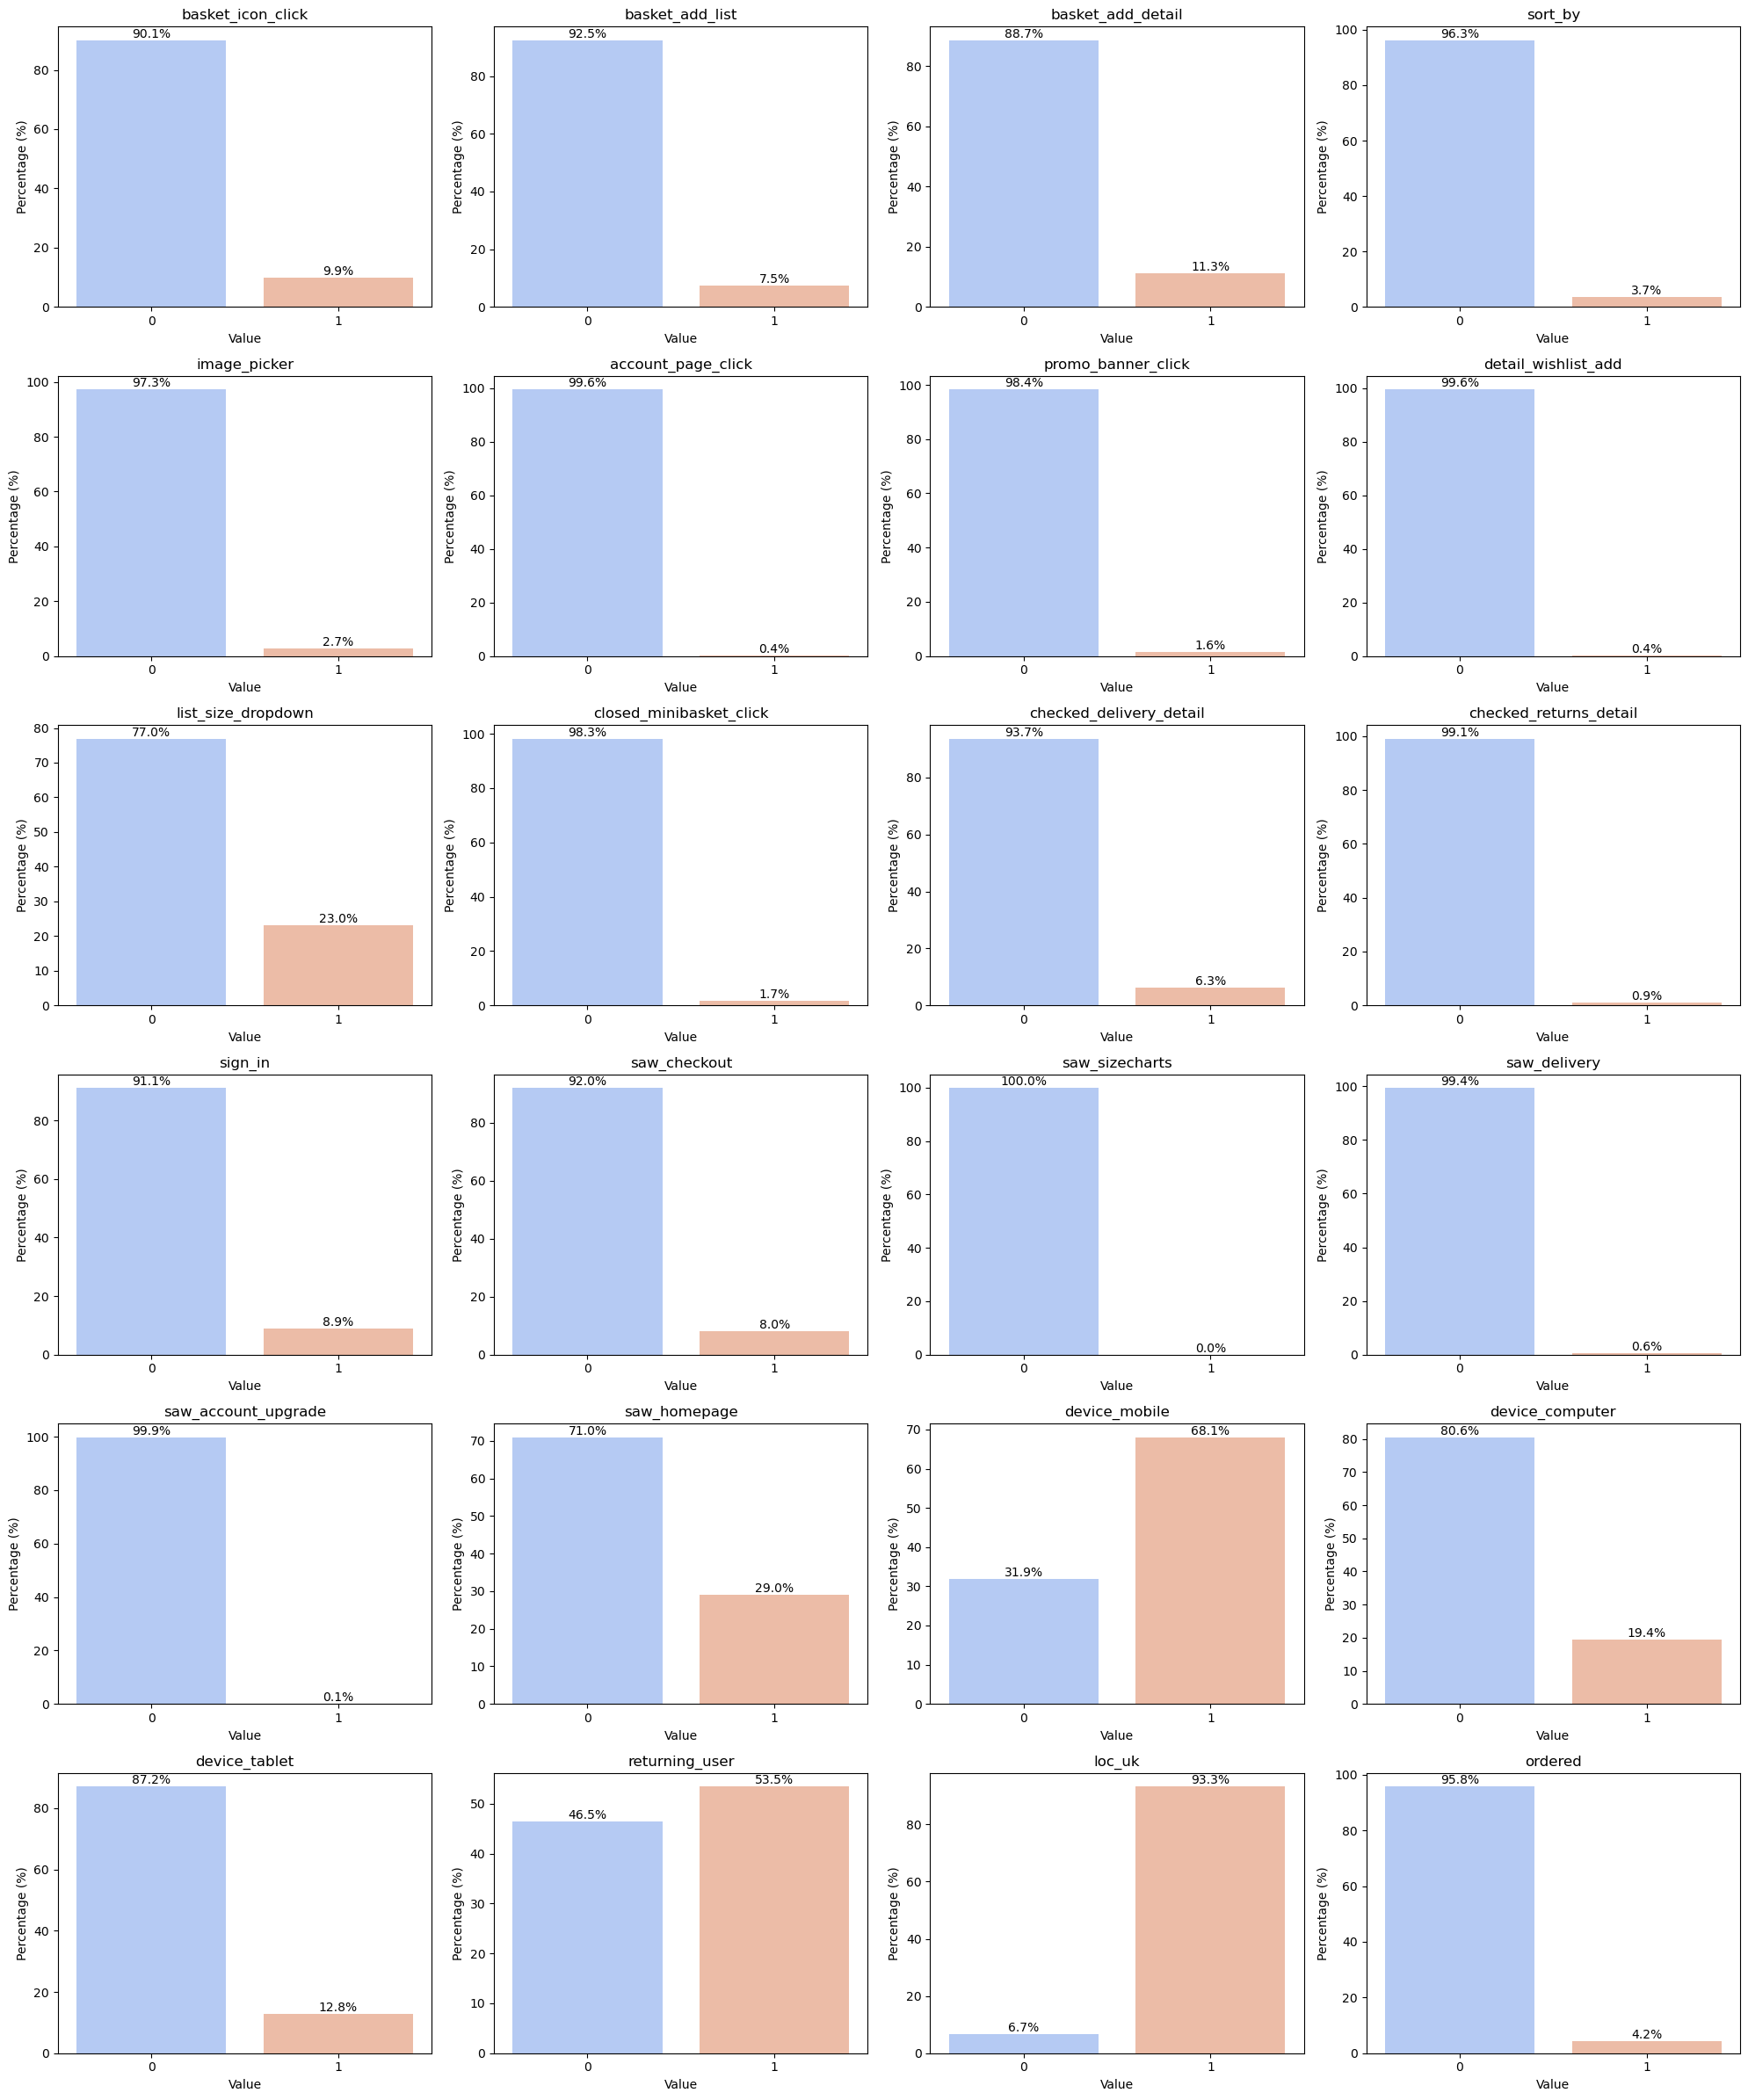

In [8]:
# Intiger column list 
int_columns = [col for col in df_train.columns if col not in ['UserID']]

# Chart grid settings
n_cols = 4  # Number of columns in grid
n_rows = int(np.ceil(len(int_columns) / n_cols))  # Number of rows in grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating plots
for i, col in enumerate(int_columns):
    # % for each value (0/1)
    percent_data = df_train[col].value_counts(normalize=True) * 100
    sns.barplot(
        x=percent_data.index,
        y=percent_data.values,
        ax=axes[i],
        palette="coolwarm",
    )
    # Labels
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_ylabel("Percentage (%)", fontsize=10)
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.1f}%", 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha="center", va="bottom", fontsize=10)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(len(int_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [9]:
df_train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,0.062874,0.009179,0.088810,0.080085,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,0.242737,0.095365,0.284469,0.271426,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X_columns_df = df_train[[col for col in df_train.columns if col not in ['UserID', 'ordered']]]

y_column_df = df_train['ordered']

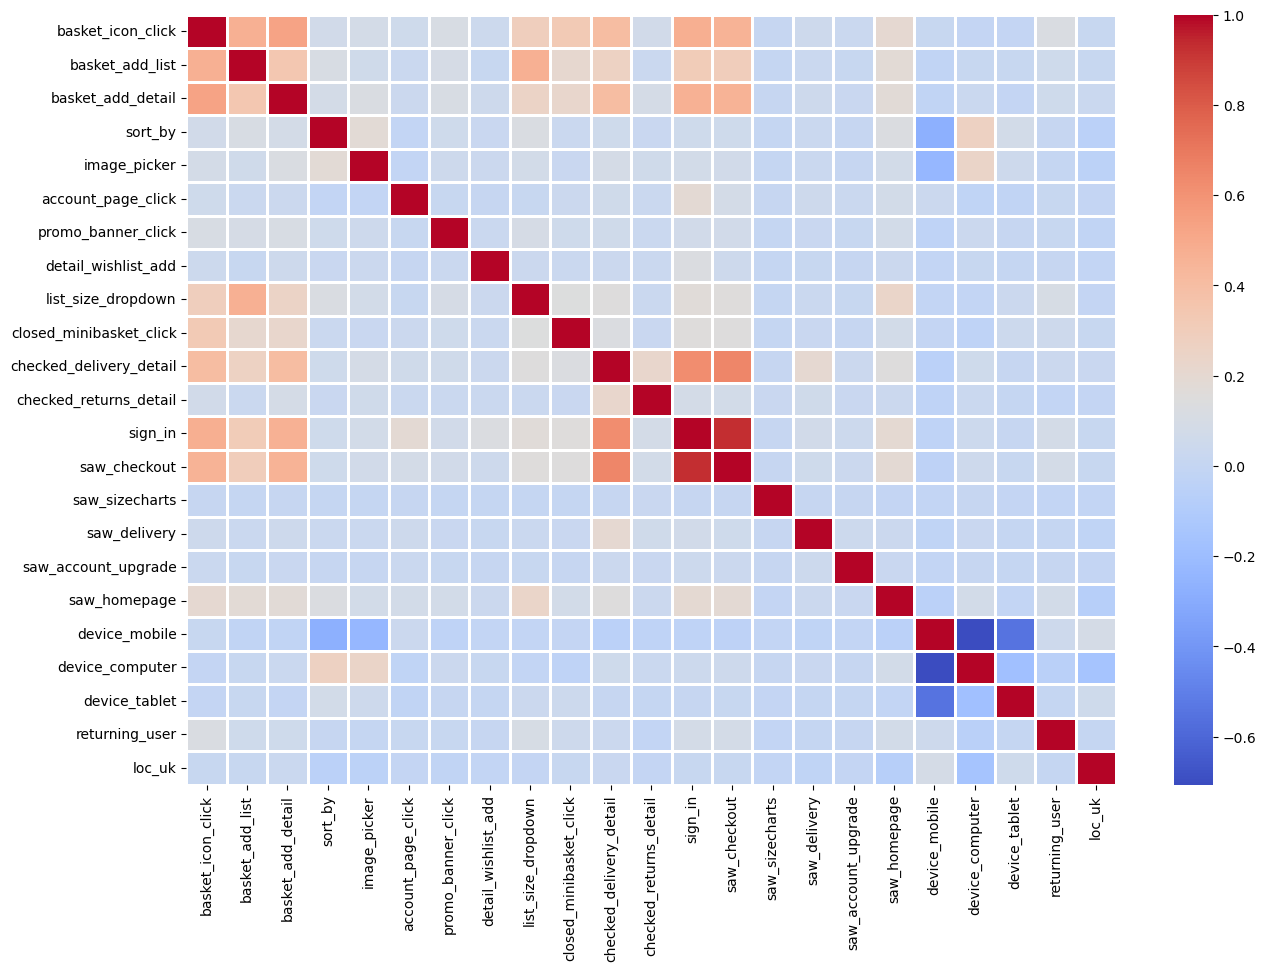

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(X_columns_df.corr(), cmap='coolwarm', linewidths=2)
plt.show()

In [14]:
numeric_df = df_train.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

ordered_correlation = correlation_matrix['ordered'].sort_values(ascending=False)
display(ordered_correlation)


ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

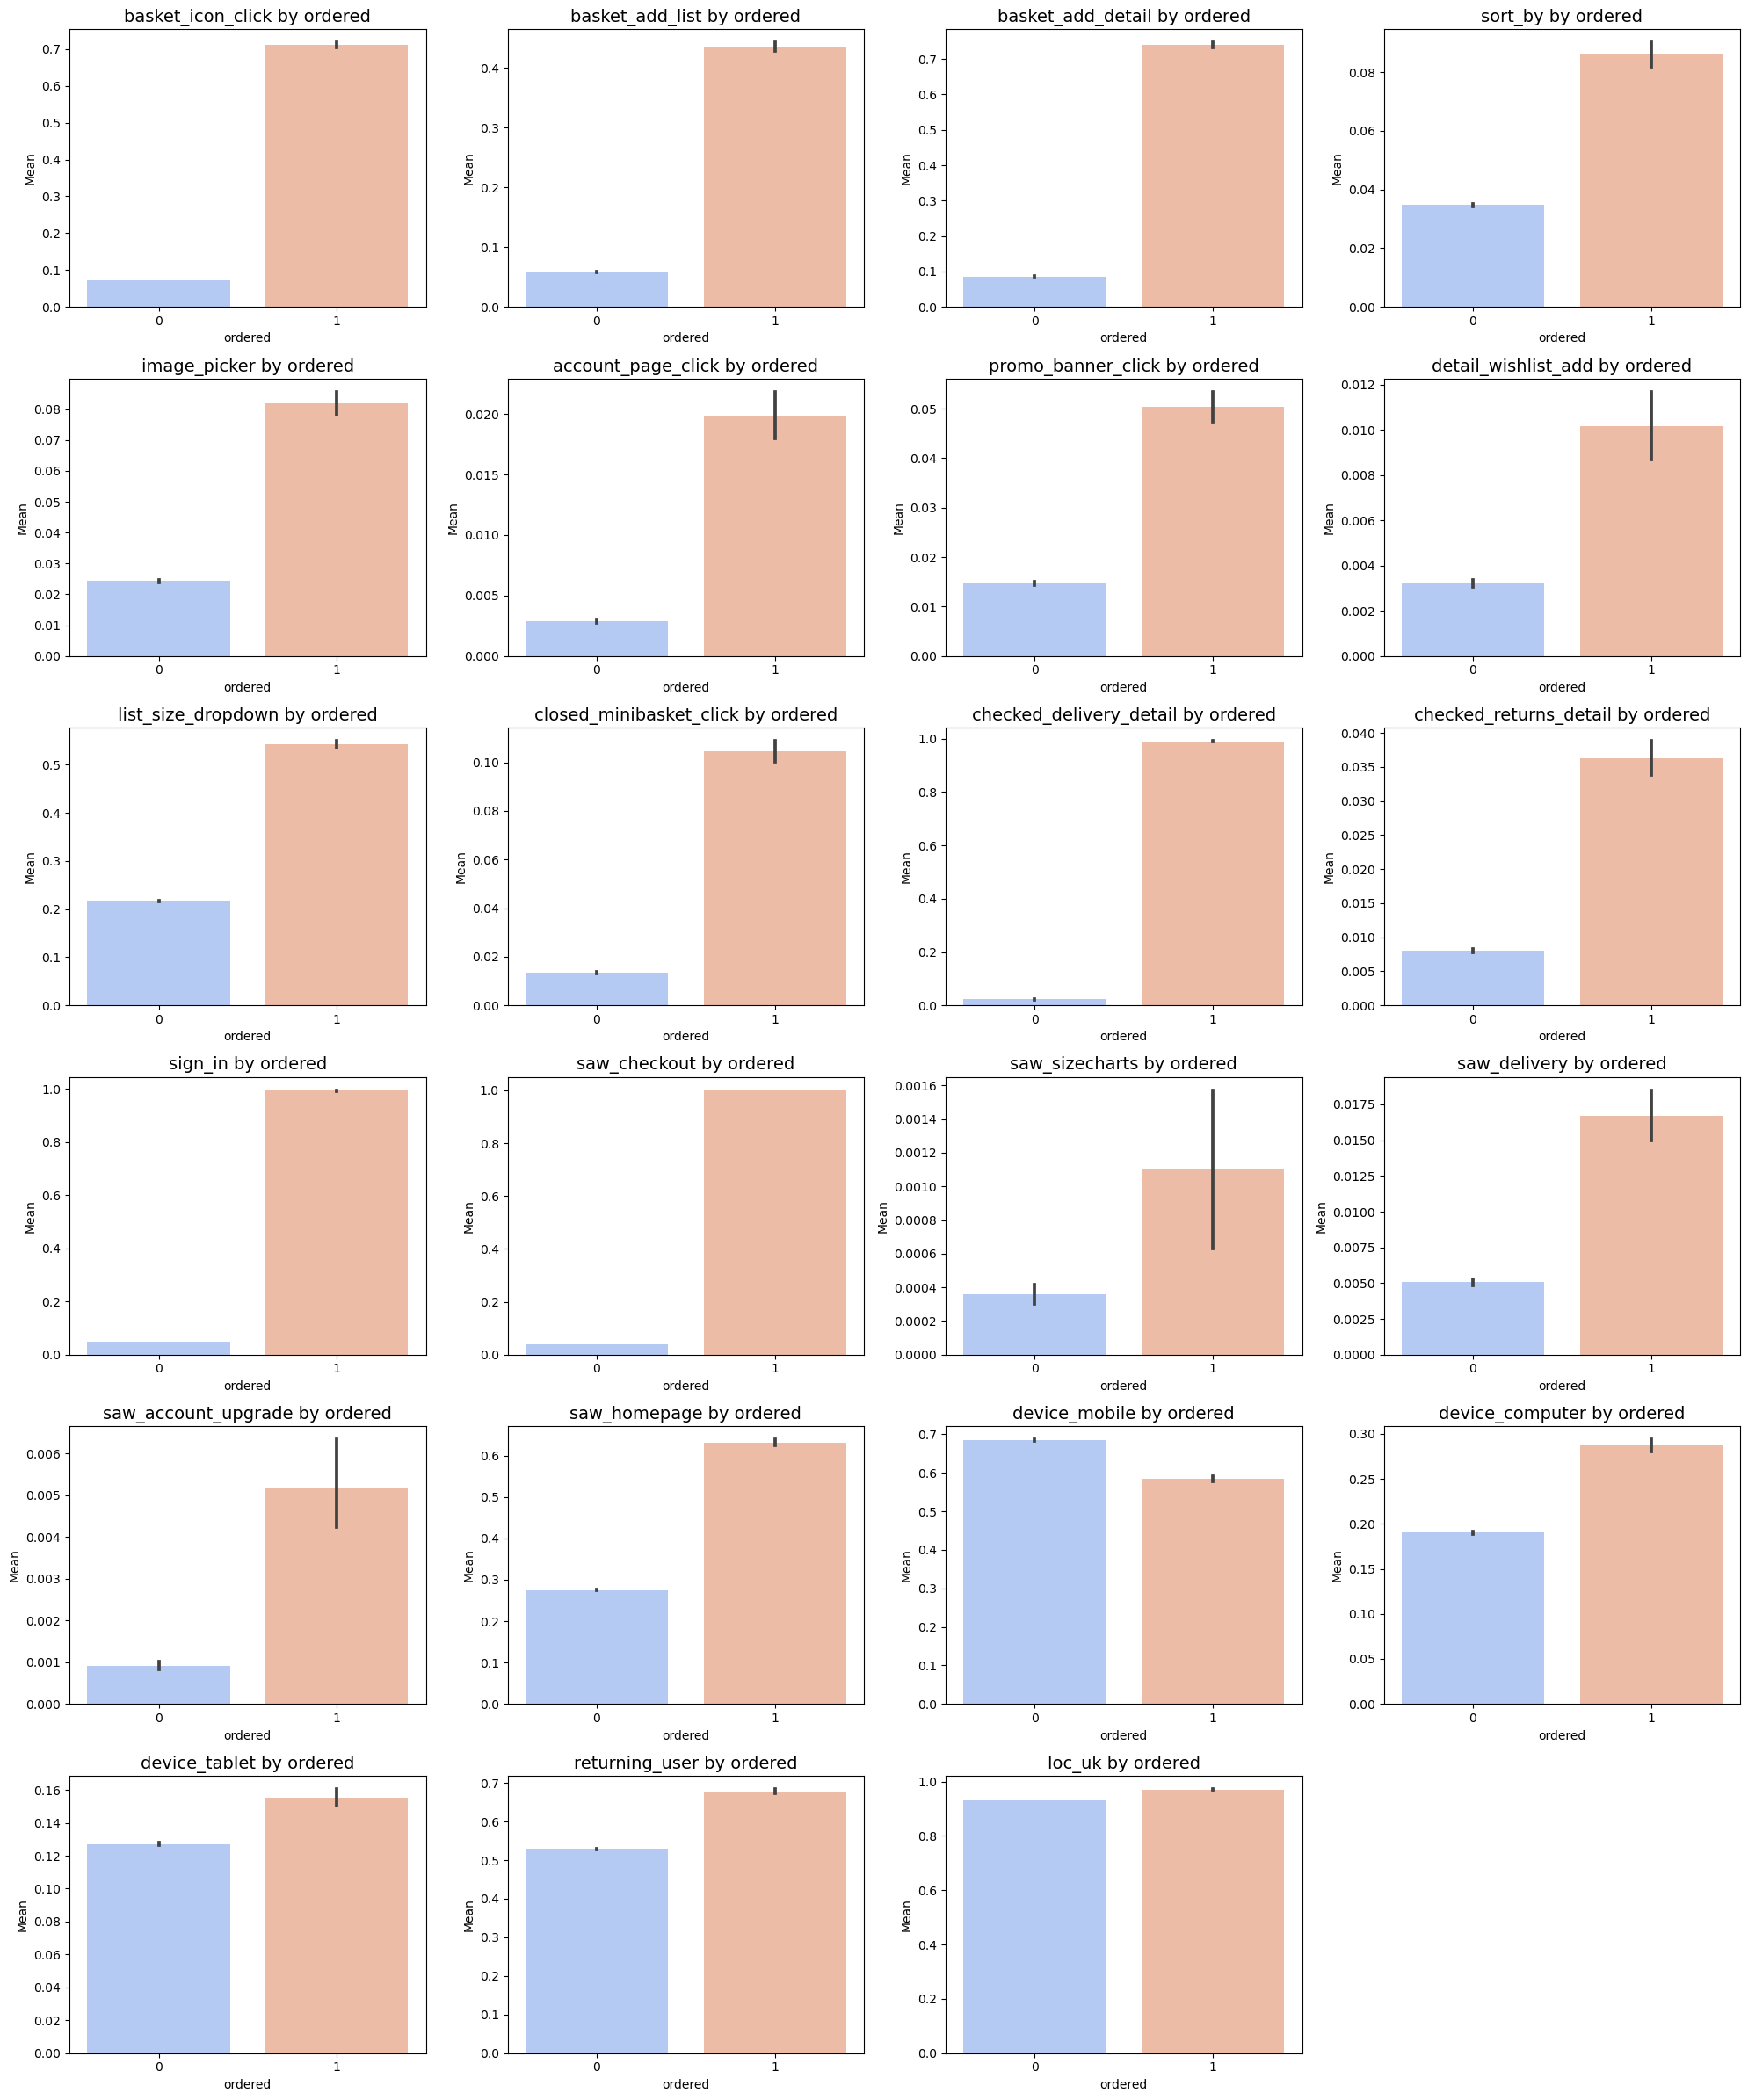

In [12]:
X_columns = [col for col in df_train.columns if col not in ['UserID', 'ordered']]

n_cols = 4 
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(X_columns):
    sns.barplot(
        x='ordered', 
        y=col, 
        data=df_train, 
        ax=axes[i], 
        palette='coolwarm',
        ci=95  
    )
    axes[i].set_title(f'{col} by ordered', fontsize=14)
    axes[i].set_xlabel('ordered')
    axes[i].set_ylabel('Mean')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [13]:
# Feature list
X_columns = [col for col in df_train.columns if col not in ['UserID', 'ordered']]

# Two groups based on 'ordered' feature
group_1 = df_train[df_train['ordered'] == 1]  # Purchase group
group_2 = df_train[df_train['ordered'] == 0]  # Non purchase group

# U Manna-Whitneya test for each feature
mann_whitney_results = {}
for col in X_columns:
    u_stat, p_value = mannwhitneyu(group_1[col], group_2[col], alternative='two-sided')
    mann_whitney_results[col] = {'U_stat': u_stat, 'p_value': p_value}

# Results DataFrame
results_df = pd.DataFrame(mann_whitney_results).T
results_df.sort_values('p_value', inplace=True)  # P-value sorting
results_df['significant'] = results_df['p_value'] < 0.05  # Significance True/False column

In [14]:
results_df.head(24)

,U_stat,p_value,significant
basket_icon_click,6.825651e+09,0.000000e+00,True
saw_homepage,5.653142e+09,0.000000e+00,True
saw_checkout,8.164530e+09,0.000000e+00,True
sign_in,8.099960e+09,0.000000e+00,True
returning_user,4.790220e+09,0.000000e+00,True
checked_delivery_detail,8.194498e+09,0.000000e+00,True
closed_minibasket_click,4.544365e+09,0.000000e+00,True
list_size_dropdown,5.520420e+09,0.000000e+00,True
checked_returns_detail,4.283106e+09,0.000000e+00,True
promo_banner_click,4.313572e+09,0.000000e+00,True


In [5]:
df_train['ordered'].value_counts()

ordered
0    436308
1     19093
Name: count, dtype: int64

EDA and data preparation summary